In [199]:
import pandas as pd 
import matplotlib.pyplot as plt

In [200]:
import pandas as pd

# Load each CSV and add a 'season' column
two_five_szn = pd.read_csv(r"C:\Users\Owner\Downloads\25_Season.csv")
two_five_szn['season'] = 2025

two_four_szn = pd.read_csv(r"C:\Users\Owner\Downloads\24_Season.csv")
two_four_szn['season'] = 2024

two_three_szn = pd.read_csv(r"C:\Users\Owner\Downloads\23_Season.csv")
two_three_szn['season'] = 2023

two_two_szn = pd.read_csv(r"C:\Users\Owner\Downloads\22_Season.csv")
two_two_szn['season'] = 2022

two_one_szn = pd.read_csv(r"C:\Users\Owner\Downloads\21_Season.csv")
two_one_szn['season'] = 2021

twenty_szn = pd.read_csv(r"C:\Users\Owner\Downloads\20_Season.csv")
twenty_szn['season'] = 2020

nineteen_szn = pd.read_csv(r"C:\Users\Owner\Downloads\19_Season.csv")
nineteen_szn['season'] = 2019

eighteen_szn = pd.read_csv(r"C:\Users\Owner\Downloads\18_Season.csv")
eighteen_szn['season'] = 2018

seventeen_szn = pd.read_csv(r"C:\Users\Owner\Downloads\17_Season.csv")
seventeen_szn['season'] = 2017

sixteen_szn = pd.read_csv(r"C:\Users\Owner\Downloads\16_Season.csv")
sixteen_szn['season'] = 2016

fifteen_szn = pd.read_csv(r"C:\Users\Owner\Downloads\15_Season.csv")
fifteen_szn['season'] = 2015

fourteen_szn = pd.read_csv(r"C:\Users\Owner\Downloads\14_Season.csv")
fourteen_szn['season'] = 2014

thirteen_szn = pd.read_csv(r"C:\Users\Owner\Downloads\13_Season.csv")
thirteen_szn['season'] = 2013

twelve_szn = pd.read_csv(r"C:\Users\Owner\Downloads\12_Season.csv")
twelve_szn['season'] = 2012

eleven_szn = pd.read_csv(r"C:\Users\Owner\Downloads\11_Season.csv")
eleven_szn['season'] = 2011

ten_szn = pd.read_csv(r"C:\Users\Owner\Downloads\10_Season.csv")
ten_szn['season'] = 2010

# Combine all DataFrames into one
combined_df = pd.concat([
    two_five_szn, two_four_szn, two_three_szn, two_two_szn, two_one_szn, 
    twenty_szn, nineteen_szn, eighteen_szn, seventeen_szn, sixteen_szn, fifteen_szn, fourteen_szn, thirteen_szn, twelve_szn, eleven_szn, ten_szn
], ignore_index=True)

# (Optional) If you want to filter for seasons starting from 2010 (in this case, they all are)
combined_df = combined_df[combined_df['season'] >= 2010]
combined_df['Team'] = combined_df['Team'].str.rstrip('*')
combined_df = combined_df[~combined_df['Team'].str.strip().str.lower().str.contains('league average')]

print(combined_df.head())


    Rk                   Team   G     MP    FG   FGA    FG%    3P   3PA  \
0  1.0      Memphis Grizzlies  52  240.0  45.3  93.2  0.486  14.0  37.5   
1  2.0    Cleveland Cavaliers  52  240.0  44.8  90.1  0.498  16.2  41.0   
2  3.0         Denver Nuggets  53  241.9  45.5  89.8  0.507  11.8  31.2   
3  4.0  Oklahoma City Thunder  51  240.0  44.0  92.6  0.475  13.7  38.6   
4  5.0        New York Knicks  52  241.0  43.8  88.8  0.493  12.9  34.3   

     3P%  ...   ORB   DRB   TRB   AST   STL  BLK   TOV    PF    PTS  season  
0  0.375  ...  13.3  34.5  47.8  29.3   9.2  6.1  16.6  21.1  123.5    2025  
1  0.395  ...  10.4  34.2  44.6  29.1   8.3  4.5  13.0  18.4  122.4    2025  
2  0.379  ...  11.2  34.6  45.8  31.2   8.3  4.8  14.2  17.4  120.9    2025  
3  0.356  ...  10.9  33.6  44.5  26.2  11.0  5.6  12.0  20.5  117.8    2025  
4  0.375  ...  10.9  32.1  43.0  27.4   8.0  3.8  13.0  16.9  117.7    2025  

[5 rows x 26 columns]


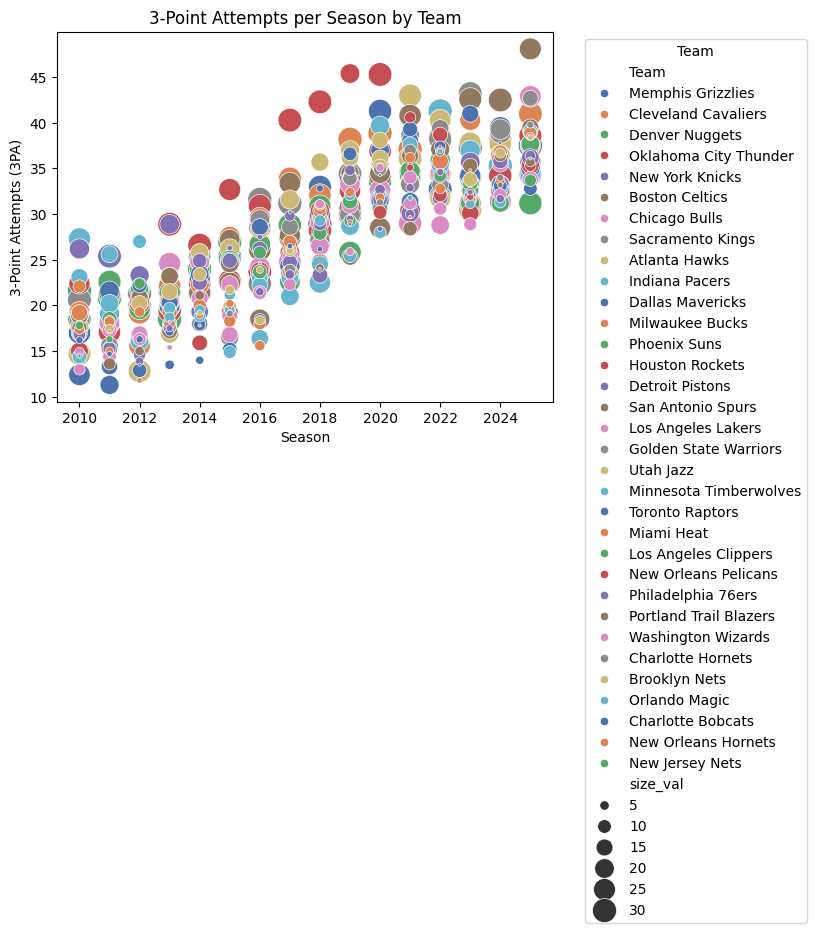

In [201]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

combined_df['size_val'] = combined_df['Rk'].max() + 1 - combined_df['Rk']
size_range = (5, 300)

# Create the scatter plot using the inverted size variable
sns.scatterplot(
    data=combined_df, 
    x='season', 
    y='3PA', 
    hue='Team', 
    size='size_val', 
    palette='deep', 
    sizes=size_range
)

plt.xlabel("Season")
plt.ylabel("3-Point Attempts (3PA)")
plt.title("3-Point Attempts per Season by Team")
plt.legend(title="Team", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

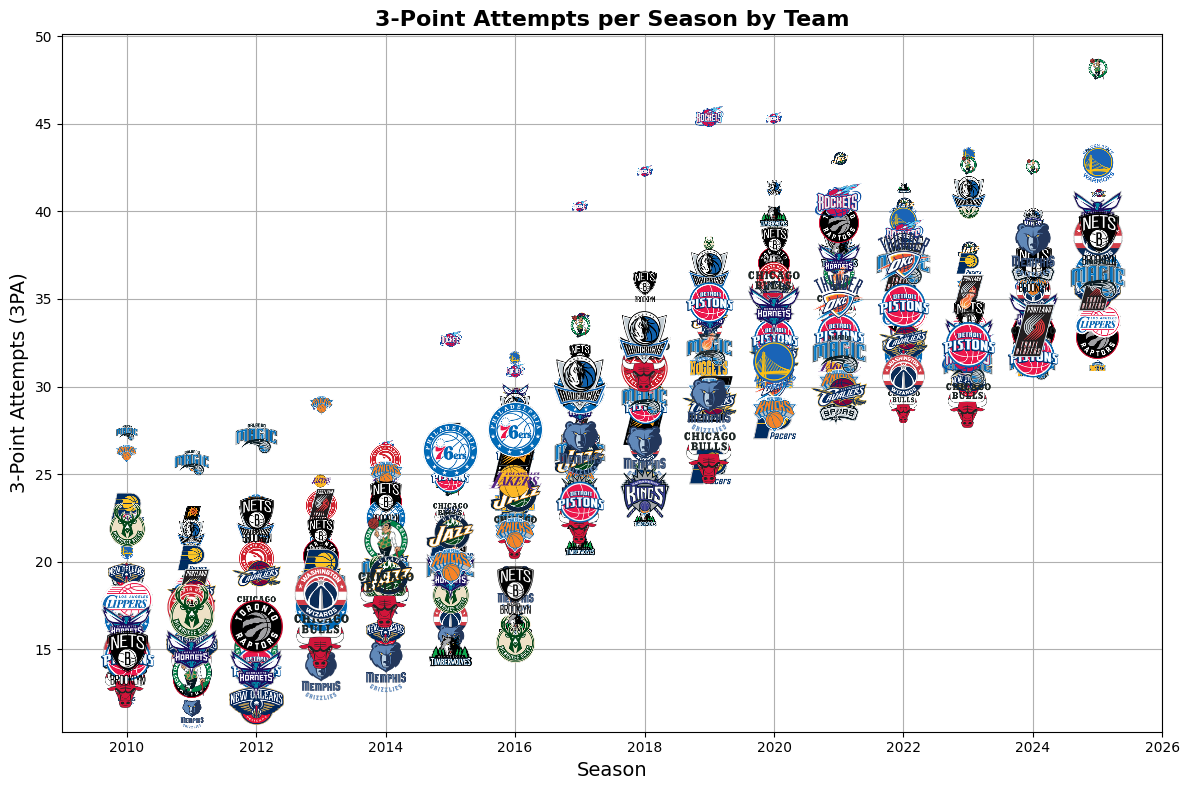

In [208]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

# Assume combined_df is already defined with the necessary columns,
# including 'season', '3PA', 'Team', and 'Rk' (used to compute size_val).

# Compute size_val as in your original code.
combined_df['size_val'] = combined_df['Rk'].max() + 1 - combined_df['Rk']

# Update the folder path if needed.
logo_folder = "Downloads/NBA_Logos"

# Mapping dictionary for team logos
team_logo_mapping = {
    "Memphis Grizzlies": "grizzlies.png",
    "Cleveland Cavaliers": "cavaliers.png",
    "Denver Nuggets": "nuggets.png",
    "Oklahoma City Thunder": "thunder.png",
    "New York Knicks": "knicks.png",
    "Boston Celtics": "celtics.png",
    "Chicago Bulls": "bulls.png",
    "Sacramento Kings": "kings.png",
    "Atlanta Hawks": "hawks.png",
    "Indiana Pacers": "pacers.png",
    "Dallas Mavericks": "mavericks.png",
    "Milwaukee Bucks": "bucks.png",
    "Phoenix Suns": "suns.png",
    "Houston Rockets": "rockets.png",
    "Detroit Pistons": "pistons.png",
    "San Antonio Spurs": "spurs.png",
    "Los Angeles Lakers": "lakers.png",
    "Golden State Warriors": "warriors.png",
    "Utah Jazz": "jazz.png",
    "Minnesota Timberwolves": "timberwolves.png",
    "Toronto Raptors": "raptors.png",
    "Miami Heat": "heat.png",
    "Los Angeles Clippers": "clippers.png",
    "New Orleans Pelicans": "pelicans.png",
    "Philadelphia 76ers": "76ers.png",
    "Portland Trail Blazers": "trailBlazers.png",
    "Washington Wizards": "wizards.png",
    "Charlotte Hornets": "hornets.png",
    "Brooklyn Nets": "nets.png",
    "Orlando Magic": "magic.png",
    # Historical or alternate names:
    "Charlotte Bobcats": "hornets.png",
    "New Jersey Nets": "nets.png",
    "New Orleans Hornets": "pelicans.png"
}

def get_team_logo(team_name):
    """
    Returns the full path to the team's logo file.
    """
    clean_team = team_name.replace("*", "").strip()
    if clean_team in team_logo_mapping:
        filename = team_logo_mapping[clean_team]
    else:
        filename = f"{clean_team.lower().replace(' ', '_')}.png"
    
    logo_path = os.path.join(logo_folder, filename)
    if os.path.exists(logo_path):
        return logo_path
    else:
        print(f"Missing logo for {team_name} at {logo_path}")
        return None

def load_logo(img_path):
    """Loads an image, resizes it to 100x100, and returns it as a NumPy array."""
    try:
        image = Image.open(img_path).convert("RGBA")
        image = image.resize((100, 100), Image.LANCZOS)
        return np.array(image)
    except Exception as e:
        print(f"Error loading logo from {img_path}: {e}")
        return None

# Define zoom scaling based on size_val
zoom_min = 0.1
zoom_max = 0.4
size_min = combined_df['size_val'].min()
size_max = combined_df['size_val'].max()

# Define zoom scaling based on size_val
zoom_min = 0.1 # Smaller zoom for lower-ranked teams
zoom_max = 0.4  # Larger zoom for higher-ranked teams

def compute_zoom(size_val):
    if size_max == size_min:
        return (zoom_min + zoom_max) / 2
    return zoom_max - (size_val - size_min) / (size_max - size_min) * (zoom_max - zoom_min)

# Create the plot
fig, ax = plt.subplots(figsize=(12, 8))

# Loop through each row and place the logo
for idx, row in combined_df.iterrows():
    x = row['season']
    y = row['3PA']
    team = row['Team']
    size_val = row['size_val']
    
    zoom = compute_zoom(size_val)
    logo_path = get_team_logo(team)
    if logo_path:
        logo_img = load_logo(logo_path)
        if logo_img is not None:
            imagebox = OffsetImage(logo_img, zoom=zoom, alpha=1.0)
            ab = AnnotationBbox(imagebox, (x, y), frameon=False)
            ax.add_artist(ab)

# Set the axis limits explicitly based on your data to avoid an enormous canvas
x_min, x_max = combined_df['season'].min(), combined_df['season'].max()
y_min, y_max = combined_df['3PA'].min(), combined_df['3PA'].max() + 1
ax.set_xlim(x_min - 1, x_max + 1)
ax.set_ylim(y_min - 1, y_max + 1)

# Set labels and title
ax.set_xlabel("Season", fontsize=14)
ax.set_ylabel("3-Point Attempts (3PA)", fontsize=14)
ax.set_title("3-Point Attempts per Season by Team", fontsize=16, fontweight="bold")
plt.grid(True)
plt.tight_layout()

plt.show()